House Price Prediction Project
==============================

This project includes a machine learning scripts for predicting house prices in Poland.


Data Overview
-------------

This dataset contains information about real estate listings in various cities across Poland. Data somes from [House Prices in Poland](https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland/data)

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Overview
-------------

In [139]:
df = pd.read_csv("data/Houses.csv", encoding="ISO-8859-2")
df.head()

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznań,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0


In [140]:
df.shape

(23764, 11)

In [141]:
df.dtypes

Unnamed: 0      int64
address        object
city           object
floor         float64
id            float64
latitude      float64
longitude     float64
price         float64
rooms         float64
sq            float64
year          float64
dtype: object

In [142]:
for column in df.columns:
    print("")
    print(f"{column} - {df[column].dtype}")
    print(f"{df[column].nunique()}")
    print(f"{df[column].unique()}")


Unnamed: 0 - int64
23764
[    0     1     2 ... 23761 23762 23763]

address - object
5419
['Podgórze Zabłocie Stanisława Klimeckiego' 'Praga-Południe Grochowska'
 'Krowodrza Czarnowiejska' ... 'Mokotów Łowicka '
 'Białołęka Giacomo Pucciniego' 'Bemowo ul. Antoniego Kocjana']

city - object
3
['Kraków' 'Warszawa' 'Poznań']

floor - float64
11
[ 2.  3.  1.  0. 10.  8.  4.  6.  5.  9.  7.]

id - float64
23764
[23918. 17828. 22784. ...  4952. 24148. 10889.]

latitude - float64
2768
[50.0492242 52.2497745 50.0669642 ... 52.4121145 52.3428824 52.2493375]

longitude - float64
2768
[19.9703793 21.1068857 19.9200249 ... 16.9385121 21.0519845 20.8973878]

price - float64
7284
[749000. 240548. 427000. ... 613197. 408296. 294021.]

rooms - float64
10
[ 3.  1.  2.  5.  4.  6.  8.  7. 10.  9.]

sq - float64
5019
[74.05 24.38 37.   ... 75.05 55.74 46.29]

year - float64
168
[2021. 1970. 1935. 2020. 2022. 2003. 1982. 1999. 1968. 1989. 2019. 2005.
 1930. 2008. 1960. 2013. 1936. 1890. 2010. 1972. 2016.

In [143]:
df = df.reset_index(drop=True)

strings = list(df.dtypes[df.dtypes == "object"].index)

for column in strings:
    df[column] = df[column].str.lower().str.replace(" ", "_")

In [144]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
address,podgórze_zabłocie_stanisława_klimeckiego,praga-południe_grochowska,krowodrza_czarnowiejska,grunwald,ochota_gotowy_budynek._stan_deweloperski._osta...
city,kraków,warszawa,kraków,poznań,warszawa
floor,2.0,3.0,2.0,2.0,1.0
id,23918.0,17828.0,22784.0,4315.0,11770.0
latitude,50.049224,52.249775,50.066964,52.404212,52.212225
longitude,19.970379,21.106886,19.920025,16.882542,20.97263
price,749000.0,240548.0,427000.0,1290000.0,996000.0
rooms,3.0,1.0,2.0,5.0,5.0
sq,74.05,24.38,37.0,166.0,105.0


In [145]:
list(df.dtypes.index)
del df["Unnamed: 0"]

In [146]:
from sklearn.model_selection import train_test_split

### Setting up the validation framework

In [147]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, shuffle=True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train["price"]
del df_val["price"]
del df_test["price"]

<Axes: ylabel='Count'>

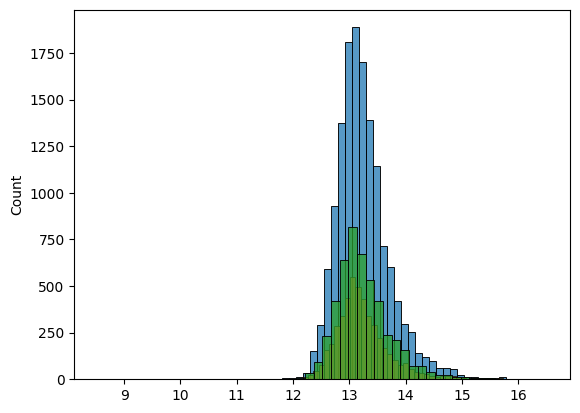

In [148]:
sns.histplot(y_train, bins=50)
sns.histplot(y_val, bins=50)
sns.histplot(y_test, bins=50)

### EDA

- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [149]:
df.isnull().sum()

address      0
city         0
floor        0
id           0
latitude     0
longitude    0
price        0
rooms        0
sq           0
year         0
dtype: int64

In [150]:
df.price.describe().round(2)

count       23764.00
mean       649353.65
std        532696.99
min          5000.00
25%        411546.12
50%        520000.00
75%        699999.00
max      15000000.00
Name: price, dtype: float64

<Axes: xlabel='year', ylabel='Count'>

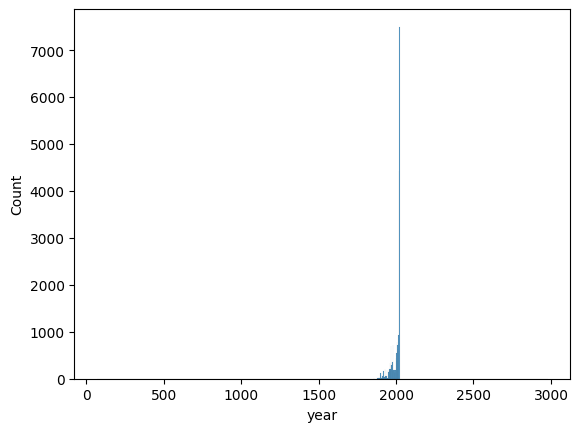

In [151]:
sns.histplot(df.year)

<Axes: xlabel='price', ylabel='Count'>

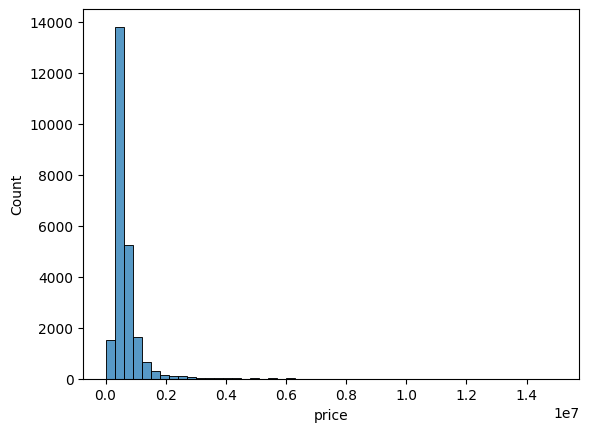

In [152]:
sns.histplot(df.price, bins=50)

As we can see the `price` feature has `long tail` (few very high values that extend far from the main cluster of values).

<Axes: xlabel='price', ylabel='Count'>

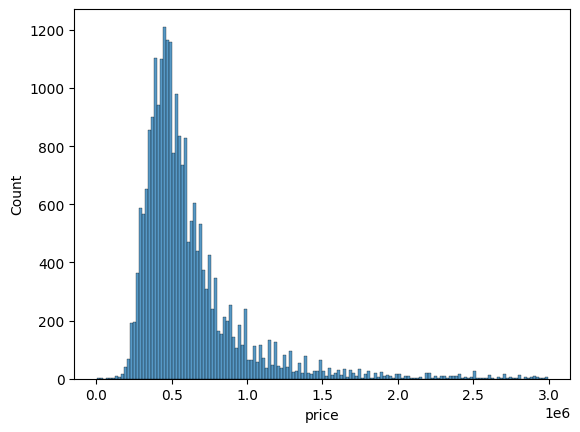

In [153]:
sns.histplot(df.price[df.price < 3000000.00])

We should apply the log transformation to the price variable using the `np.log1p()` function to:
- reduce skewness
- improve model performance

<Axes: xlabel='price', ylabel='Count'>

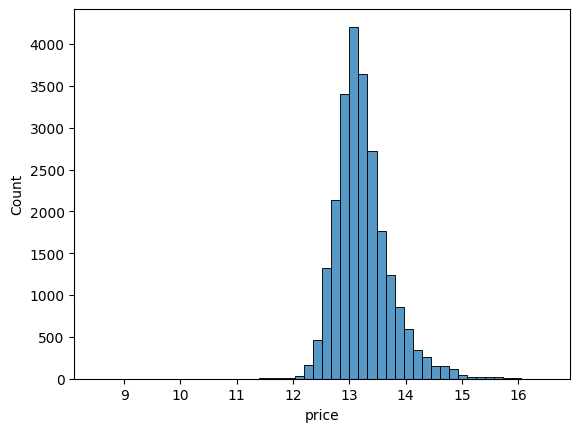

In [154]:
price_logs = np.log1p(df.price)
sns.histplot(price_logs, bins=50)

In [155]:
global_price = df_full_train.price.mean()
round(global_price, 2)

np.float64(648367.29)

#### Feature importance

In [156]:
from sklearn.metrics import mutual_info_score

In [157]:
features = [
    'address',
    'city',
    'floor',
    'id',
    'latitude',
    'longitude',
    'price',
    'rooms',
    'sq',
    'year'
]

numerical = [
    'floor',     
    'latitude', 
    'longitude',     
    'rooms', 
    'sq', 
    'year'
]

categorical = [
    'address',
    'city'
]

In [158]:
df[numerical + ["price"]].corr()

,floor,latitude,longitude,rooms,sq,year,price
floor,1.000000,0.082347,0.130120,-0.000096,-0.002142,-0.012815,0.123427
latitude,0.082347,1.000000,-0.117007,0.017425,-0.007114,-0.051990,0.070825
longitude,0.130120,-0.117007,1.000000,-0.009377,0.000230,-0.049675,0.196294
rooms,-0.000096,0.017425,-0.009377,1.000000,0.018898,0.038226,0.454321
sq,-0.002142,-0.007114,0.000230,0.018898,1.000000,0.002709,0.007509
year,-0.012815,-0.051990,-0.049675,0.038226,0.002709,1.000000,-0.009934
price,0.123427,0.070825,0.196294,0.454321,0.007509,-0.009934,1.000000


In [159]:
def mutual_info_price(series):
    return mutual_info_score(series, df_full_train.price)

mi = df_full_train[categorical].apply(mutual_info_price)
mi.sort_values(ascending=False)

/Users/pist/Library/Caches/pypoetry/virtualenvs/housepredict-EEIR0pNc-py3.13/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pist/Library/Caches/pypoetry/virtualenvs/housepredict-EEIR0pNc-py3.13/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


address    5.048236
city       0.547477
dtype: float64

In [160]:
copied_numerical = numerical + ["price"].copy()
correlations = []
for c in numerical:
    copied_numerical.remove(c)
    correlation = df[copied_numerical].corrwith(df[c])
    correlation.index = [f"{c} and {col}" for col in correlation.index]
    correlations.append(correlation)

correlations_sorted = pd.concat(correlations).sort_values(ascending=False)
correlations_sorted.index[0], float(correlations_sorted.iloc[0])

('rooms and price', 0.45432077512312474)

In [161]:
df_full_train[numerical].corrwith(df_full_train.price).sort_values(ascending=False)

rooms        0.448926
longitude    0.197052
floor        0.123422
latitude     0.070611
sq           0.007673
year        -0.014375
dtype: float64

#### SQ should have bigger correlation - we need to check why

In [162]:
df.sq.describe().round()

count      23764.0
mean         103.0
std         6534.0
min            9.0
25%           42.0
50%           54.0
75%           69.0
max      1007185.0
Name: sq, dtype: float64

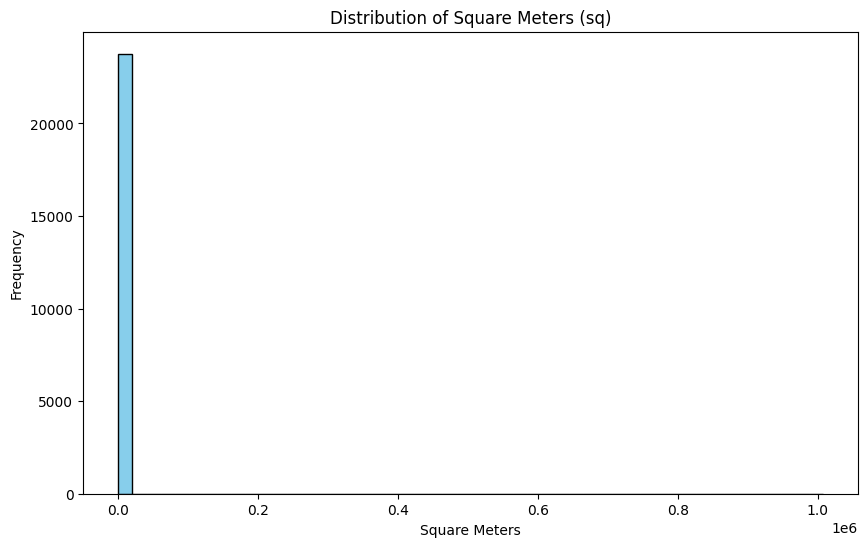

In [163]:
plt.figure(figsize=(10, 6))
plt.hist(df['sq'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Square Meters (sq)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

In [164]:
df = df[df['sq'] <= 500]   

In [165]:
df.sq.describe().round()

count    23761.0
mean        60.0
std         28.0
min          9.0
25%         42.0
50%         54.0
75%         69.0
max        442.0
Name: sq, dtype: float64

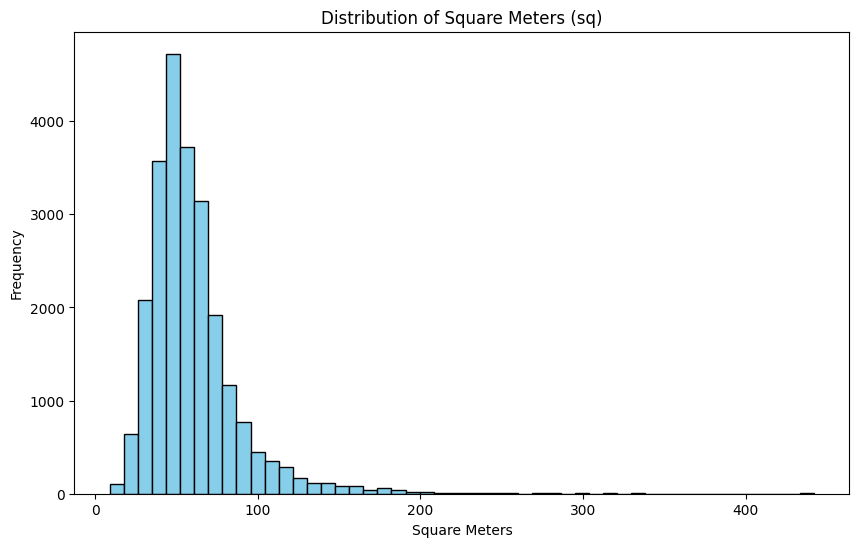

In [166]:
plt.figure(figsize=(10, 6))
plt.hist(df['sq'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Square Meters (sq)')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

In [167]:
df_full_train.rooms.unique()

array([ 1.,  3.,  2.,  4.,  5.,  7.,  6.,  9.,  8., 10.])

#### Calculate correlation between 'sq' and 'price'

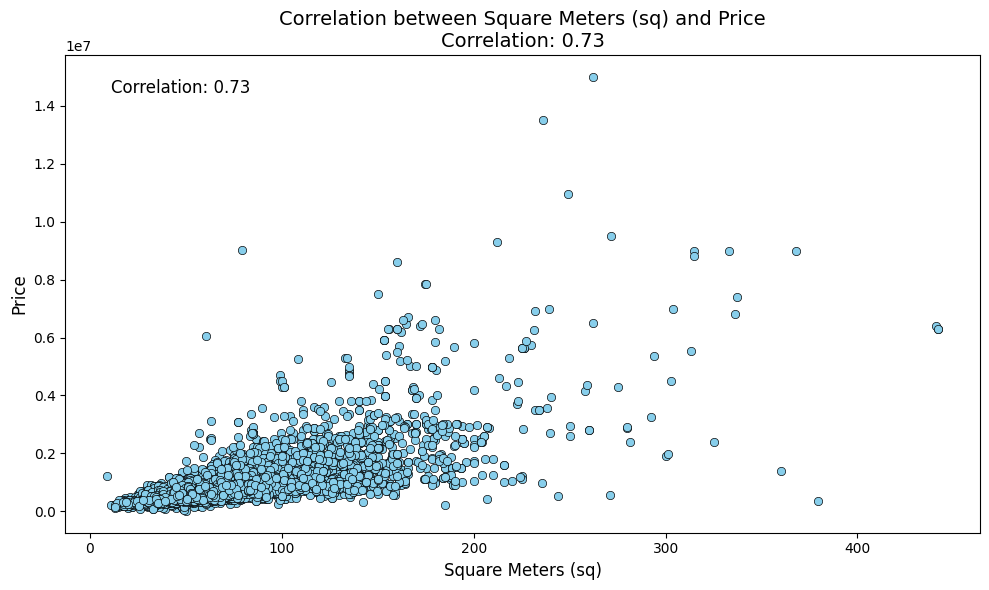

In [168]:
correlation = df['sq'].corr(df['price'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sq', y='price', data=df, color='skyblue', edgecolor='black')
plt.title(f"Correlation between Square Meters (sq) and Price\nCorrelation: {correlation:.2f}", fontsize=14)
plt.xlabel('Square Meters (sq)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.text(0.05, 0.95, f"Correlation: {correlation:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.tight_layout()
plt.show()

#### Calculate mean price for each square meter range

In [169]:
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, float('inf')]
labels = ["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140-160", "160-180", "180-200", "200+"]
df_full_train['sq_range'] = pd.cut(df_full_train['sq'], bins=bins, labels=labels)
mean_price_by_sq_range = df_full_train.groupby("sq_range")["price"].mean().round(3)
mean_price_by_sq_range

/var/folders/wq/xxr4ff9s1hg945mqypn203yskzqq0j/T/ipykernel_53930/575264074.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_sq_range = df_full_train.groupby("sq_range")["price"].mean().round(3)


sq_range
0-20        276004.396
20-40       380963.758
40-60       516307.630
60-80       677483.648
80-100      981760.010
100-120    1296386.500
120-140    1599402.072
140-160    2152877.417
160-180    2690767.100
180-200    2363024.067
200+       4154002.984
Name: price, dtype: float64

In [170]:
mean_price_by_rooms = df_full_train.groupby("rooms")["price"].mean()
mean_price_by_rooms.round(3)

rooms
1.0      372316.260
2.0      496857.367
3.0      675245.885
4.0      989392.003
5.0     1486417.221
6.0     1791933.995
7.0     2652060.200
8.0     1306247.500
9.0     1479000.000
10.0    2126541.429
Name: price, dtype: float64

#### Price per floor

In [171]:
mean_price_by_floor = df_full_train.groupby("floor")["price"].mean()
mean_price_by_floor.round(3)

floor
0.0      566411.252
1.0      640374.721
2.0      623697.851
3.0      640173.928
4.0      629518.921
5.0      688234.935
6.0      767688.788
7.0      729888.365
8.0      652477.889
9.0      694570.894
10.0    1038065.270
Name: price, dtype: float64

#### Price per city

In [172]:
mean_price_by_city = df_full_train.groupby("city")["price"].mean()
mean_price_by_city.round(3)

city
kraków      593093.600
poznań      467826.947
warszawa    779840.726
Name: price, dtype: float64

#### Price vs Year

In [173]:
df.year.describe()

count    23761.000000
mean      2000.548588
std         48.316523
min         70.000000
25%       1985.000000
50%       2019.000000
75%       2021.000000
max       2980.000000
Name: year, dtype: float64

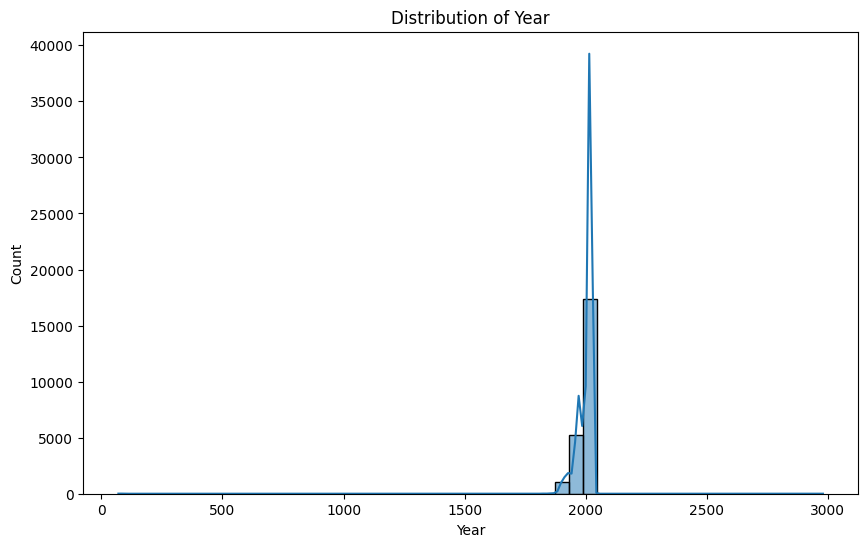

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=50, kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

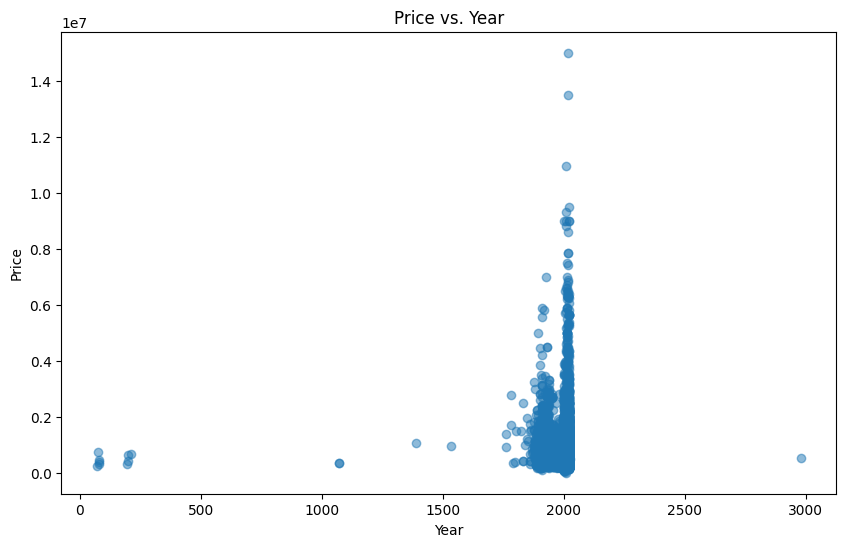

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5)
plt.title("Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [176]:
df['age'] = 2024 - df['year']

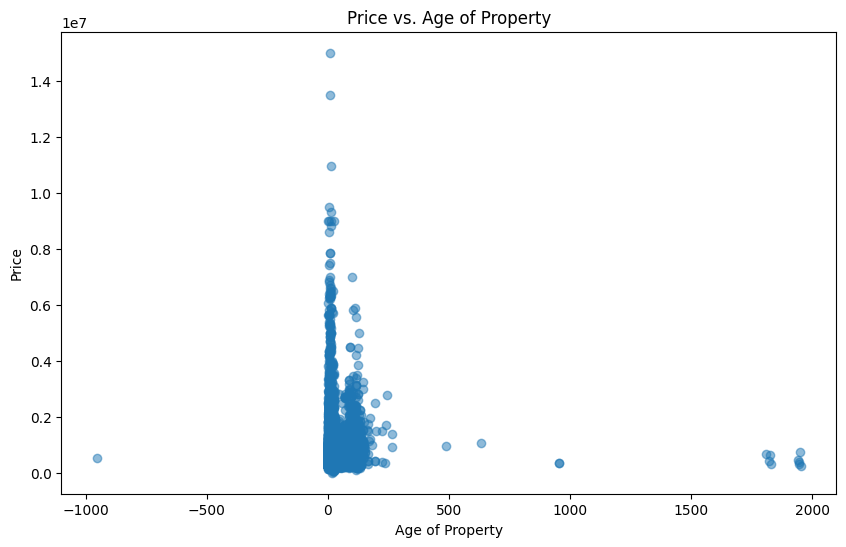

In [177]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'], alpha=0.5)
plt.title("Price vs. Age of Property")
plt.xlabel("Age of Property")
plt.ylabel("Price")
plt.show()

In [178]:
df[['age', 'price']].corr()


,age,price
age,1.000000,0.009933
price,0.009933,1.000000


We can try to `clip` the year data. It’s a way to handle outliers by “capping” values to stay within a certain range without actually deleting any data.

In [179]:
df['year'] = df['year'].clip(lower=1900, upper=2024)

In [180]:
df.year.describe()

count    23761.000000
mean      2001.401498
std         29.126812
min       1900.000000
25%       1985.000000
50%       2019.000000
75%       2021.000000
max       2024.000000
Name: year, dtype: float64

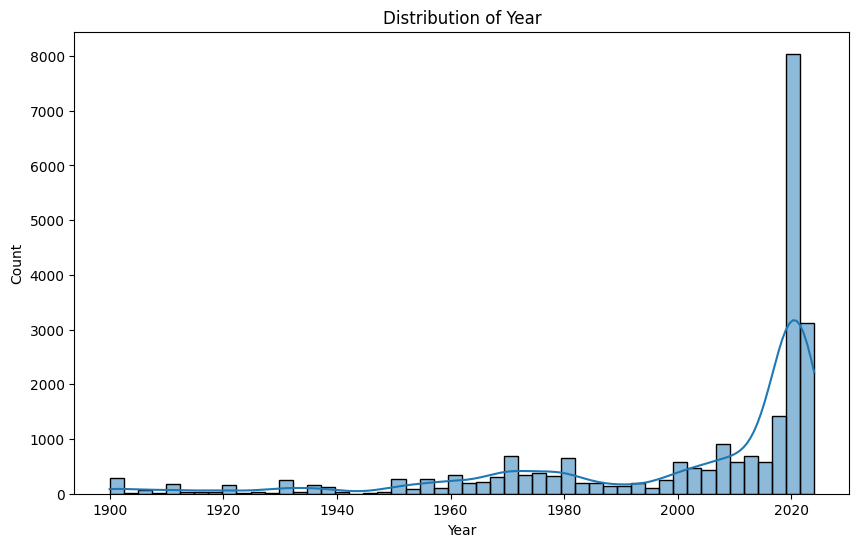

In [181]:
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=50, kde=True)
plt.title("Distribution of Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

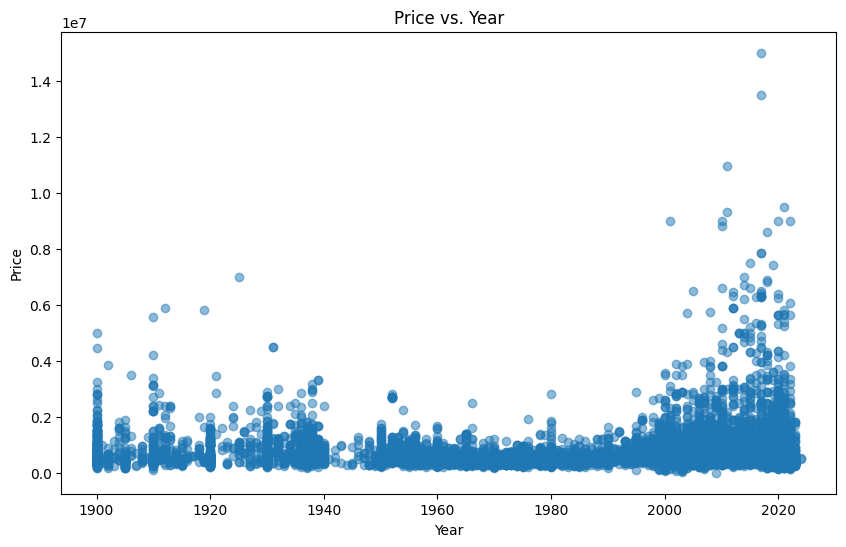

In [182]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5)
plt.title("Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

#### Adding price per square meter

In [183]:
df['price_per_sq'] = df['price'] / df['sq']
df[['sq', 'price', 'price_per_sq']]

,sq,price,price_per_sq
0,74.05,749000.0,10114.787306
1,24.38,240548.0,9866.611977
2,37.00,427000.0,11540.540541
3,166.00,1290000.0,7771.084337
4,105.00,996000.0,9485.714286
...,...,...,...
23759,77.00,543000.0,7051.948052
23760,71.00,910000.0,12816.901408
23761,50.67,430695.0,8500.000000
23762,38.86,359000.0,9238.291302


In [184]:
df['price_per_sq'].describe()

count     23761.000000
mean      10762.333542
std        3859.524507
min         100.000000
25%        8400.000000
50%        9948.453608
75%       12319.148936
max      138636.363636
Name: price_per_sq, dtype: float64

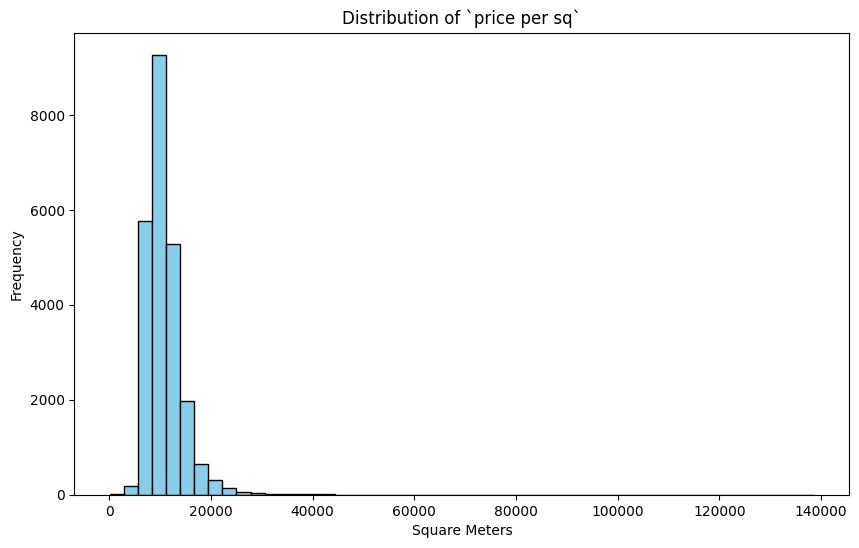

In [185]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_per_sq'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of `price per sq`')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()

We can use `interquartile range (IQR)` method to detect and filter out extreme values.

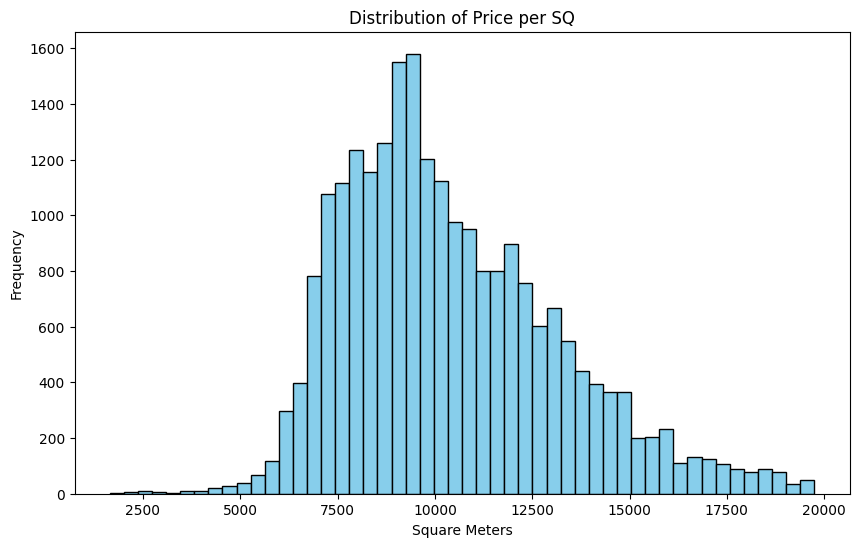

In [186]:
# Calculate IQR
Q1 = df['price_per_sq'].quantile(0.25)
Q3 = df['price_per_sq'].quantile(0.80)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['price_per_sq'] >= lower_bound) & (df['price_per_sq'] <= upper_bound)]
df_filtered_out = df[(df['price_per_sq'] <= lower_bound) | (df['price_per_sq'] >= upper_bound)]
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['price_per_sq'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price per SQ')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()


In [190]:
def load_data(sq_threshold = 500):
    df = pd.read_csv("data/Houses.csv", encoding="ISO-8859-2")
    list(df.dtypes.index)
    del df["Unnamed: 0"]

    df = df.reset_index(drop=True)

    strings = list(df.dtypes[df.dtypes == "object"].index)

    for column in strings:
        df[column] = df[column].str.lower().str.replace(" ", "_")

    if sq_threshold is not None:
        df = df[df['sq'] <= sq_threshold]        

    df['year'] = df['year'].clip(lower=1900, upper=2024)
    df['age'] = 2024 - df['year']
    
    return df


def split_data(df):
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, shuffle=True)

    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train["price"]
    del df_val["price"]
    del df_test["price"]

    return df_full_train, df_train, y_train, df_val, y_val, df_test, y_test

## Training the model

### LinearRegression

In [191]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [192]:
def train_lr(df, y_train, features):
    dicts = df[features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LinearRegression()
    model.fit(X_train, y_train)
    return dv, model

def predict_lr(df, dv, model, features):
    val_dicts = df[features].to_dict(orient="records")
    X_val = dv.transform(val_dicts)
    y_pred = model.predict(X_val)
    return y_pred

def validate_lr_model(features, title):
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)
    dv, model = train_lr(df_train, y_train, features)
    y_pred = predict_lr(df_val, dv, model, features)
    rmse = root_mean_squared_error(y_val, y_pred)
    sns.histplot(y_pred, color='red', bins=50, alpha=0.5) 
    sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
    plt.title(title)
    plt.show()
    return rmse

> NOTE: When `address` is used in the following examples, training and validating the model may take some time

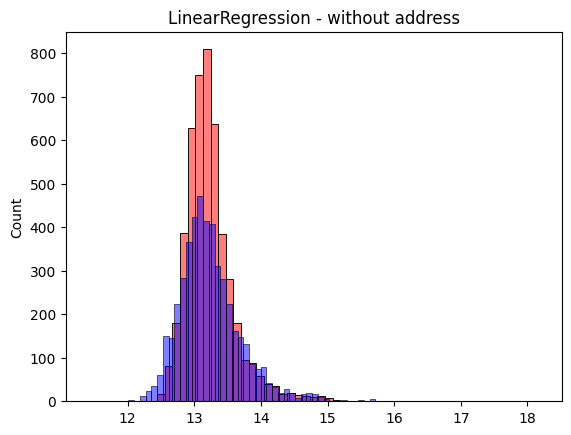

np.float64(0.25913236049328614)

In [193]:
features = [
    'city',
    'floor',    
    'latitude',
    'longitude',    
    'rooms',
    'sq',
    'year'
]
validate_lr_model(features, "LinearRegression - without address")

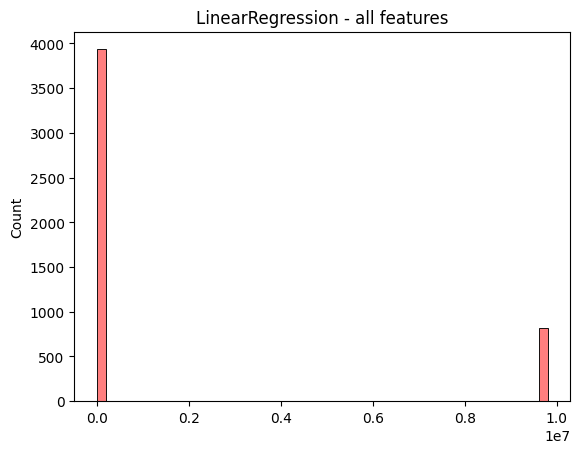

np.float64(4064143.368970765)

In [194]:
features = [
    'address',
    'city',
    'floor',    
    'latitude',
    'longitude',    
    'rooms',
    'sq',
    'year'
]
validate_lr_model(features, "LinearRegression - all features")

### RidgeRegression

In [122]:
from sklearn.linear_model import Ridge

In [195]:
def train_rr(df, y_train, features, r=1):
    dicts = df[features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    return dv, model

def predict_rr(df, dv, model, features):
    val_dicts = df[features].to_dict(orient="records")
    X_val = dv.transform(val_dicts)
    y_pred = model.predict(X_val)
    return y_pred

def validate_rr_model(features, title):
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)
    dv, model = train_rr(df_train, y_train, features)
    y_pred = predict_rr(df_val, dv, model, features)
    rmse = root_mean_squared_error(y_val, y_pred)
    sns.histplot(y_pred, color='red', bins=50, alpha=0.5) 
    sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
    plt.title(title)
    plt.show()
    return rmse

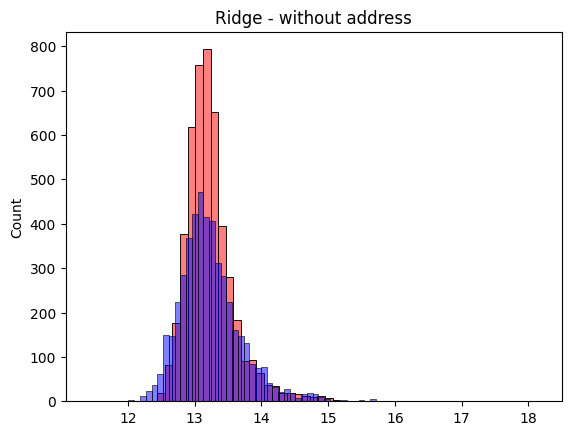

np.float64(0.25917337871651996)

In [197]:
features = [    
    'city',
    'floor',    
    'latitude',
    'longitude',    
    'rooms',
    'sq',
    'year'
]
validate_rr_model(features, "Ridge - without address")

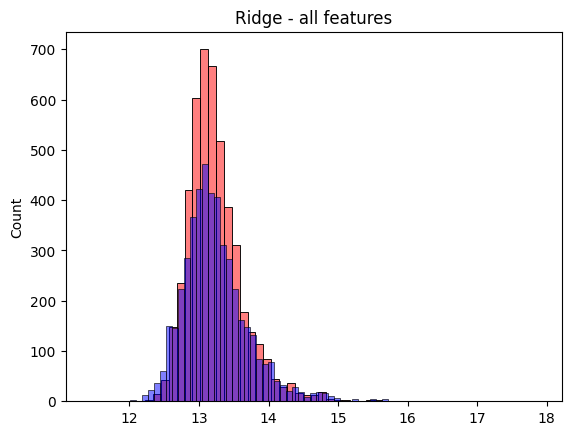

np.float64(0.20372996498582852)

In [198]:
features = [
    'address',
    'city',
    'floor',    
    'latitude',
    'longitude',    
    'rooms',
    'sq',
    'year'
]
validate_rr_model(features, "Ridge - all features")

In [199]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)    
    
    dv, model = train_rr(df_train, y_train, features, r=r)
    y_pred = predict_rr(df_val, dv, model, features)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"R: {r} - {rmse}")

R: 0 - 60729213518.316246
R: 0.01 - 0.2079244830817317
R: 0.1 - 0.2036064256643282
R: 1 - 0.20372996498582852
R: 5 - 0.21367460900840882
R: 10 - 0.22021069576150396
R: 100 - 0.24333176582758106


### Lasso

In [200]:
from sklearn.linear_model import Lasso

In [203]:
def train_lasso(df, y_train, features, r=1):
    dicts = df[features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = Lasso(alpha=r)
    model.fit(X_train, y_train)
    return dv, model

def predict_lasso(df, dv, model, features):
    val_dicts = df[features].to_dict(orient="records")
    X_val = dv.transform(val_dicts)
    y_pred = model.predict(X_val)
    return y_pred

def validate_lasso_model(features, title):
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)
    dv, model = train_lasso(df_train, y_train, features)
    y_pred = predict_lasso(df_val, dv, model, features)
    rmse = root_mean_squared_error(y_val, y_pred)
    sns.histplot(y_pred, color='red', bins=50, alpha=0.5) 
    sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
    plt.title(title)
    plt.show()
    return rmse

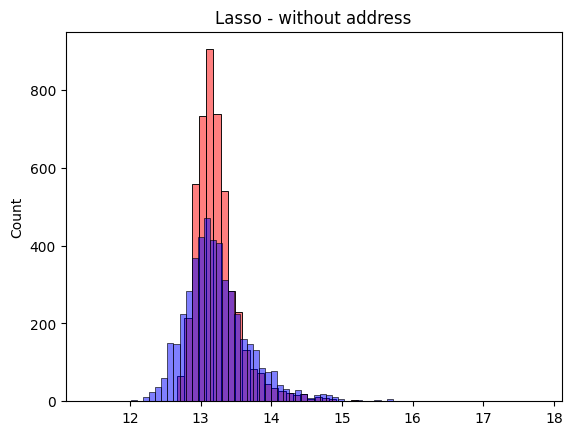

np.float64(0.29236954431005985)

In [205]:
features = [    
    'city',
    'floor',    
    'latitude',
    'longitude',    
    'rooms',
    'sq',
    'year'
]
validate_lasso_model(features, "Lasso - without address")

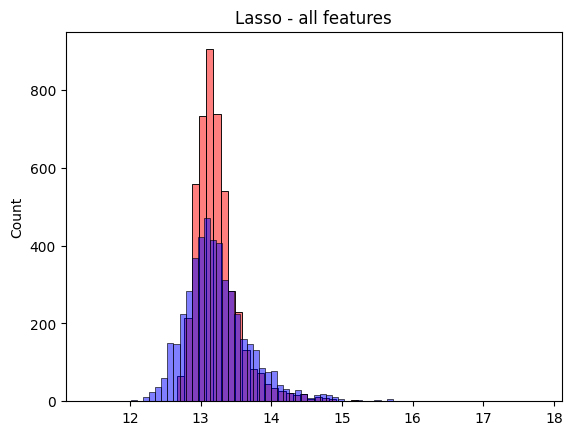

np.float64(0.29236954431005985)

In [206]:
features = [
    'address',
    'city',
    'floor',    
    'latitude',
    'longitude',    
    'rooms',
    'sq',
    'year'
]
validate_lasso_model(features, "Lasso - all features")

In [207]:
r_values = [0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)    
    
    dv, model = train_lasso(df_train, y_train, features, r=r)
    y_pred = predict_lasso(df_val, dv, model, features)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"R: {r} - {rmse}")

R: 0.01 - 0.26071125524466704
R: 0.1 - 0.2704365791804204
R: 1 - 0.29236954431005985
R: 5 - 0.33846143469258383
R: 10 - 0.4483181298434801
R: 100 - 0.46913400999236393


## Feature scaling + OHE

Scale the Data: Logistic regression can benefit significantly from feature scaling, especially if the features are on different scales. You can use StandardScaler or MinMaxScaler from scikit-learn to scale your features.


In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)    

In [ ]:
X_train_num = df_train[numerical].values
X_train_num

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(df_train[categorical].values)
X_train = np.column_stack([X_train_num, X_train_cat])
model = LinearRegression()
model.fit(X_train, y_train)
X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)
X_val_cat = ohe.transform(df_val[categorical].values)
X_val = np.column_stack([X_val_num, X_val_cat])
y_pred = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred).round(3)
rmse

np.float64(1639139.609)

In [217]:
def train_ss(df, y_train, categorical, model = "LinearRegression", r = 0.01):
    X_train_num = df[numerical].values

    scaler = StandardScaler()

    X_train_num = scaler.fit_transform(X_train_num)
    X_train_num

    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    X_train_cat = ohe.fit_transform(df[categorical].values)
    X_train_cat

    X_train = np.column_stack([X_train_num, X_train_cat])
    if model == "LinearRegression":
        model = LinearRegression()
    elif model == "Ridge":
        model = Ridge(alpha=r)
    elif model == "Lasso":
        model = Lasso(alpha=r)
    model.fit(X_train, y_train)
    return scaler, ohe, model

def predict_ss(df, scaler, ohe, model, y_val, categorical):
    X_val_num = df[numerical].values
    X_val_num = scaler.transform(X_val_num)
    X_val_cat = ohe.transform(df[categorical].values)
    X_val = np.column_stack([X_val_num, X_val_cat])

    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    return rmse

### LinearRegression with StandardScaler and Address

In [218]:
test_categorical_features = [
    'address', 
    'city'
]
df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)    
    
scaler, ohe, model = train_ss(df_train, y_train, test_categorical_features, model="LinearRegression")
rmse = predict_ss(df_val, scaler, ohe, model, y_val, test_categorical_features)
rmse

np.float64(1639139.609)

### LinearRegression with StandardScaler and without Address

In [219]:
test_categorical_features = [
    'city'
]
df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)    
    
scaler, ohe, model = train_ss(df_train, y_train, test_categorical_features, model="LinearRegression")
rmse = predict_ss(df_val, scaler, ohe, model, y_val, test_categorical_features)
rmse

np.float64(0.259)

### Ridge with StandardScaler and Address

In [220]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

test_categorical_features = [
    'address', 
    'city'
]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                

    scaler, ohe, model = train_ss(df_train, y_train, test_categorical_features, model="Ridge", r=r)
    rmse = predict_ss(df_val, scaler, ohe, model, y_val, test_categorical_features)
    print(f"R: {r} - {rmse}")

R: 0 - 1000050899149.692
R: 0.01 - 0.208
R: 0.1 - 0.204
R: 1 - 0.204
R: 5 - 0.214
R: 10 - 0.22
R: 100 - 0.244


### Ridge with StandardScaler and without Address

In [222]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

test_categorical_features = [
    'city'
]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                

    scaler, ohe, model = train_ss(df_train, y_train, test_categorical_features, model="Ridge", r=r)
    rmse = predict_ss(df_val, scaler, ohe, model, y_val, test_categorical_features)
    print(f"R: {r} - {rmse}")

R: 0 - 0.259
R: 0.01 - 0.259
R: 0.1 - 0.259
R: 1 - 0.259
R: 5 - 0.259
R: 10 - 0.259
R: 100 - 0.26


### Lasso with StandardScaler and Address

In [223]:
r_values = [0.01, 0.1, 1, 5, 10, 100]

test_categorical_features = [
    'address', 
    'city'
]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                

    scaler, ohe, model = train_ss(df_train, y_train, test_categorical_features, model="Lasso", r=r)
    rmse = predict_ss(df_val, scaler, ohe, model, y_val, test_categorical_features)
    print(f"R: {r} - {rmse}")

R: 0.01 - 0.261
R: 0.1 - 0.298
R: 1 - 0.469
R: 5 - 0.469
R: 10 - 0.469
R: 100 - 0.469


### Lasso with StandardScaler and without Address

In [224]:
r_values = [0.01, 0.1, 1, 5, 10, 100]

test_categorical_features = [
    'city'
]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                

    scaler, ohe, model = train_ss(df_train, y_train, test_categorical_features, model="Lasso", r=r)
    rmse = predict_ss(df_val, scaler, ohe, model, y_val, test_categorical_features)
    print(f"R: {r} - {rmse}")

R: 0.01 - 0.261
R: 0.1 - 0.298
R: 1 - 0.469
R: 5 - 0.469
R: 10 - 0.469
R: 100 - 0.469


Why is the RMSE so poor when using `Address`?

#### Problem with One-Hot Encoding of High-Cardinality Feature
- The address feature has many unique values, which creates a massive number of columns when using one-hot encoding.
- This causes the model to struggle as it tries to fit on a high-dimensional and sparse matrix, which can lead to unstable predictions and inflated error values like the RMSE you observed.

#### Possible Solutions
- Target Encoding :
Instead of one-hot encoding, we can use target encoding for address, which assigns each unique address value a mean price based on training data.
This keeps the dimensionality low while capturing the information value of address.
- Feature Engineering to Reduce Sparsity:
We can consider grouping address by larger categories, such as neighborhood or district, if such information is available. This reduces the cardinality of the feature while retaining location-based information.

We will try the first one!

## Target Encoding for address

In [225]:
from category_encoders import TargetEncoder

In [226]:
def train_with_te(df, y_train, categorical, model = "LinearRegression", r = 0.01):
    X_train_num = df[numerical].values

    scaler = StandardScaler()

    X_train_num = scaler.fit_transform(X_train_num)
    X_train_num    

    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    X_train_cat = ohe.fit_transform(df[categorical].values)
    X_train_cat

    X_train_cat_city = ohe.fit_transform(df[['city']])
    X_train_address_enc = df[['address_enc']].values

    X_train = np.column_stack([X_train_num, X_train_cat_city, X_train_address_enc])

    if model == "LinearRegression":
        model = LinearRegression()
    elif model == "Ridge":
        model = Ridge(alpha=r, random_state=42)
    elif model == "Lasso":
        model = Lasso(alpha=r, random_state=42)
    model.fit(X_train, y_train)
    return scaler, ohe, model

def predict_with_te(df, scaler, ohe, model, y_val):
    X_val_num = df[numerical].values
    X_val_num = scaler.transform(X_val_num)

    X_val_cat_city = ohe.transform(df[['city']])
    X_val_address_enc = df[['address_enc']].values

    X_val = np.column_stack([X_val_num, X_val_cat_city, X_val_address_enc])

    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    return rmse

### LinearRegression with target encoder

In [228]:
test_categorical_features = [
    'address', 
    'city'
]

In [229]:
df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)   

# Target encoding for 'address'
encoder = TargetEncoder()
df_train['address_enc'] = encoder.fit_transform(df_train['address'], y_train)
df_val['address_enc'] = encoder.transform(df_val['address'])
    
scaler, ohe, model = train_with_te(df_train, y_train, test_categorical_features, model="LinearRegression")
rmse = predict_with_te(df_val, scaler, ohe, model, y_val)
rmse

np.float64(0.239)

### Ridge with target encoder

In [230]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)   

    # Target encoding for 'address'
    encoder = TargetEncoder()
    df_train['address_enc'] = encoder.fit_transform(df_train['address'], y_train)
    df_val['address_enc'] = encoder.transform(df_val['address'])
        
    scaler, ohe, model = train_with_te(df_train, y_train, test_categorical_features, model="Ridge", r=r)
    rmse = predict_with_te(df_val, scaler, ohe, model, y_val)
    print(f"R: {r} - {rmse}")

R: 0 - 0.239
R: 0.01 - 0.239
R: 0.1 - 0.239
R: 1 - 0.239
R: 5 - 0.238
R: 10 - 0.238
R: 100 - 0.237


### Lasso with target encoder

In [232]:
r_values = [0.01, 0.1, 1, 5, 10, 100]

for r in r_values:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)   

    # Target encoding for 'address'
    encoder = TargetEncoder()
    df_train['address_enc'] = encoder.fit_transform(df_train['address'], y_train)
    df_val['address_enc'] = encoder.transform(df_val['address'])
        
    scaler, ohe, model = train_with_te(df_train, y_train, test_categorical_features, model="Lasso", r=r)
    rmse = predict_with_te(df_val, scaler, ohe, model, y_val)
    print(f"R: {r} - {rmse}")

R: 0.01 - 0.24
R: 0.1 - 0.298
R: 1 - 0.469
R: 5 - 0.469
R: 10 - 0.469
R: 100 - 0.469


## DecisionTreeRegressor with one hot encoding

In [233]:
from sklearn.tree import DecisionTreeRegressor

In [234]:
def train_dtr_with_ohe(df, y_train, features, max_depth, min_samples_split = 2, min_samples_leaf = 1):
    dicts = df[features].to_dict(orient="records")
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = DecisionTreeRegressor(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    return dv, model

def predict_dtr_with_ohe(df, dv, model, y_val, features):
    val_dicts = df[features].to_dict(orient="records")
    X_val = dv.transform(val_dicts)
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    return rmse

In [235]:
for max_depth in range(1, 30, 2):
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df) 
        
    dv, model = train_dtr_with_ohe(df_train, y_train, features, max_depth=max_depth)
    rmse = predict_dtr_with_ohe(df_val, dv, model, y_val, features)
    print(f"Max depth: {max_depth} - rmse: {rmse}")

Max depth: 1 - 0.362
Max depth: 3 - 0.282
Max depth: 5 - 0.244
Max depth: 7 - 0.222
Max depth: 9 - 0.205
Max depth: 11 - 0.194
Max depth: 13 - 0.194
Max depth: 15 - 0.194
Max depth: 17 - 0.194
Max depth: 19 - 0.197
Max depth: 21 - 0.199
Max depth: 23 - 0.2
Max depth: 25 - 0.199
Max depth: 27 - 0.199
Max depth: 29 - 0.199


In [236]:
max_depth = 11
scores = []
for min_samples_split in range(5, 10, 1):
    for min_samples_leaf in range(2, 5, 1):
        df = load_data()
        df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)             
        dv, model = train_dtr_with_ohe(df_train, y_train, features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        rmse = predict_dtr_with_ohe(df_val, dv, model, y_val, features)
        scores.append((min_samples_split, min_samples_leaf, rmse))
scores

[(5, 2, np.float64(0.195)),
 (5, 3, np.float64(0.193)),
 (5, 4, np.float64(0.191)),
 (6, 2, np.float64(0.195)),
 (6, 3, np.float64(0.193)),
 (6, 4, np.float64(0.191)),
 (7, 2, np.float64(0.196)),
 (7, 3, np.float64(0.194)),
 (7, 4, np.float64(0.191)),
 (8, 2, np.float64(0.195)),
 (8, 3, np.float64(0.193)),
 (8, 4, np.float64(0.191)),
 (9, 2, np.float64(0.196)),
 (9, 3, np.float64(0.194)),
 (9, 4, np.float64(0.191))]

In [237]:
df_scores = pd.DataFrame(scores, columns=["min_samples_split", "min_samples_leaf", "rmse"])
df_scores.head()

,min_samples_split,min_samples_leaf,rmse
0,5,2,0.195
1,5,3,0.193
2,5,4,0.191
3,6,2,0.195
4,6,3,0.193


In [238]:
df_score_pivot = df_scores.pivot(index="min_samples_split", columns=["min_samples_leaf"], values=["rmse"])
df_score_pivot.round(3)
df_score_pivot

rmse              
min_samples_leaf       2      3      4
min_samples_split                     
5                  0.195  0.193  0.191
6                  0.195  0.193  0.191
7                  0.196  0.194  0.191
8                  0.195  0.193  0.191
9                  0.196  0.194  0.191

<Axes: xlabel='None-min_samples_leaf', ylabel='min_samples_split'>

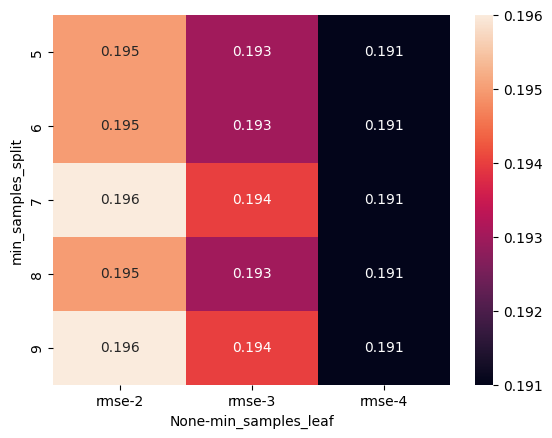

In [239]:
sns.heatmap(df_score_pivot, annot=True, fmt=".3f")

In [240]:
max_depth = 15
min_samples_split = 5
min_samples_leaf = 4
df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)             
dv, model = train_dtr_with_ohe(df_train, y_train, features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
rmse = predict_dtr_with_ohe(df_val, dv, model, y_val, features)
rmse
# Best RMSE when using DecisionTreeRegressor with one hot encoding

np.float64(0.188)

## DecisionTreeRegressor with StandardScaler

In [242]:
def train_dtr_with_scaler(df, y_train, categorical, max_depth, min_samples_split = 2, min_samples_leaf = 1):
    X_train_num = df[numerical].values

    scaler = StandardScaler()

    X_train_num = scaler.fit_transform(X_train_num)
    X_train_num

    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    X_train_cat = ohe.fit_transform(df[categorical].values)
    X_train_cat

    X_train = np.column_stack([X_train_num, X_train_cat])
    model = DecisionTreeRegressor(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    return scaler, ohe, model

def predict_dtr_with_scaler(df, scaler, ohe, model, y_val):
    X_val_num = df[numerical].values
    X_val_num = scaler.transform(X_val_num)
    X_val_cat = ohe.transform(df[categorical].values)
    X_val = np.column_stack([X_val_num, X_val_cat])

    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    return rmse

In [243]:
for max_depth in range(1, 30, 2):
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df) 
        
    scaler, ohe, model = train_dtr_with_scaler(df_train, y_train, categorical, max_depth=max_depth)
    rmse = predict_dtr_with_scaler(df_val, scaler, ohe, model, y_val)
    print(f"Max depth: {max_depth} - {rmse}")

Max depth: 1 - 0.362
Max depth: 3 - 0.282
Max depth: 5 - 0.244
Max depth: 7 - 0.222
Max depth: 9 - 0.205
Max depth: 11 - 0.194
Max depth: 13 - 0.197
Max depth: 15 - 0.192
Max depth: 17 - 0.197
Max depth: 19 - 0.197
Max depth: 21 - 0.196
Max depth: 23 - 0.195
Max depth: 25 - 0.198
Max depth: 27 - 0.201
Max depth: 29 - 0.2


In [244]:
max_depth = 15
scores = []
for min_samples_split in range(2, 10, 1):
    for min_samples_leaf in range(3, 8, 1):
        df = load_data()
        df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

        scaler, ohe, model = train_dtr_with_scaler(df_train, y_train, categorical, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        rmse = predict_dtr_with_scaler(df_val, scaler, ohe, model, y_val)
        scores.append((min_samples_split, min_samples_leaf, rmse))
scores

[(2, 3, np.float64(0.193)),
 (2, 4, np.float64(0.188)),
 (2, 5, np.float64(0.186)),
 (2, 6, np.float64(0.188)),
 (2, 7, np.float64(0.188)),
 (3, 3, np.float64(0.193)),
 (3, 4, np.float64(0.188)),
 (3, 5, np.float64(0.186)),
 (3, 6, np.float64(0.188)),
 (3, 7, np.float64(0.188)),
 (4, 3, np.float64(0.193)),
 (4, 4, np.float64(0.188)),
 (4, 5, np.float64(0.186)),
 (4, 6, np.float64(0.188)),
 (4, 7, np.float64(0.188)),
 (5, 3, np.float64(0.193)),
 (5, 4, np.float64(0.188)),
 (5, 5, np.float64(0.186)),
 (5, 6, np.float64(0.188)),
 (5, 7, np.float64(0.188)),
 (6, 3, np.float64(0.193)),
 (6, 4, np.float64(0.188)),
 (6, 5, np.float64(0.186)),
 (6, 6, np.float64(0.188)),
 (6, 7, np.float64(0.188)),
 (7, 3, np.float64(0.194)),
 (7, 4, np.float64(0.188)),
 (7, 5, np.float64(0.186)),
 (7, 6, np.float64(0.188)),
 (7, 7, np.float64(0.188)),
 (8, 3, np.float64(0.193)),
 (8, 4, np.float64(0.188)),
 (8, 5, np.float64(0.186)),
 (8, 6, np.float64(0.188)),
 (8, 7, np.float64(0.188)),
 (9, 3, np.float64(0

<Axes: xlabel='None-min_samples_leaf', ylabel='min_samples_split'>

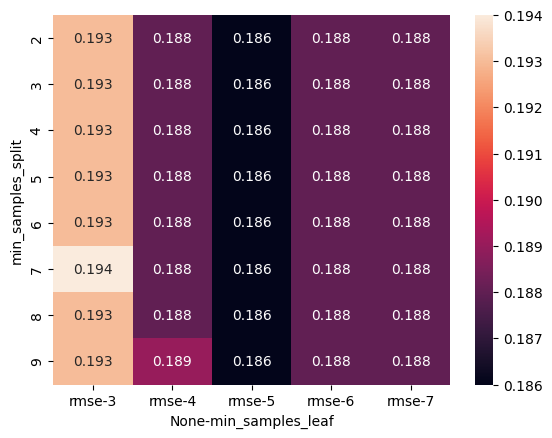

In [245]:
df_scores = pd.DataFrame(scores, columns=["min_samples_split", "min_samples_leaf", "rmse"])
df_scores.head()
df_score_pivot = df_scores.pivot(index="min_samples_split", columns=["min_samples_leaf"], values=["rmse"])
df_score_pivot.round(3)
df_score_pivot
sns.heatmap(df_score_pivot, annot=True, fmt=".3f")

In [246]:
max_depth = 15
min_samples_split = 2
min_samples_leaf = 5

df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

scaler, ohe, model = train_dtr_with_scaler(df_train, y_train, categorical, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
rmse = predict_dtr_with_scaler(df_val, scaler, ohe, model, y_val)
rmse  # Best RMSE when using DecisionTreeRegressor with StandarScaler
        

np.float64(0.186)

## RandomForestRegressor

In [247]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
def train_rfr_with_scaler(
        df, y_train, 
        categorical, 
        n_estimators=10,
        random_state=1,
        min_samples_leaf=1,
        max_features=1.0,
        bootstrap = True,
        max_depth=None,
        n_jobs=-1):
    X_train_num = df[numerical].values

    scaler = StandardScaler()

    X_train_num = scaler.fit_transform(X_train_num)
    X_train_num

    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    X_train_cat = ohe.fit_transform(df[categorical].values)
    X_train_cat

    X_train = np.column_stack([X_train_num, X_train_cat])
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=random_state,
        n_jobs=n_jobs,
        max_features=max_features,
        bootstrap=bootstrap
    )
    
    model.fit(X_train, y_train)
    return scaler, ohe, model

def predict_rfr_with_scaler(df, scaler, ohe, model, y_val):
    X_val_num = df[numerical].values
    X_val_num = scaler.transform(X_val_num)
    X_val_cat = ohe.transform(df[categorical].values)
    X_val = np.column_stack([X_val_num, X_val_cat])

    y_pred = model.predict(X_val)

    rmse = root_mean_squared_error(y_val, y_pred).round(3)
    return rmse

In [ ]:
df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

scaler, ohe, model = train_rfr_with_scaler(df_train, y_train, categorical)
rmse = predict_rfr_with_scaler(df_val, scaler, ohe, model, y_val)
rmse

np.float64(0.156)

NOTE: The below one can take almost 30 minutes to run

In [252]:
# If you don't want to wait so long, just uncomment the code below, it will use less features

# categorical = [        
#     "city"
# ]

In [251]:
scores = []
for n in range(10, 201, 10):
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

    scaler, ohe, model = train_rfr_with_scaler(df_train, y_train, categorical, n_estimators=n)
    rmse = predict_rfr_with_scaler(df_val, scaler, ohe, model, y_val)
    scores.append((n, rmse))
scores

[(10, np.float64(0.156)),
 (20, np.float64(0.153)),
 (30, np.float64(0.152)),
 (40, np.float64(0.151)),
 (50, np.float64(0.151)),
 (60, np.float64(0.151)),
 (70, np.float64(0.151)),
 (80, np.float64(0.151)),
 (90, np.float64(0.151)),
 (100, np.float64(0.151)),
 (110, np.float64(0.151)),
 (120, np.float64(0.151)),
 (130, np.float64(0.151)),
 (140, np.float64(0.151)),
 (150, np.float64(0.151)),
 (160, np.float64(0.151)),
 (170, np.float64(0.151)),
 (180, np.float64(0.151)),
 (190, np.float64(0.15)),
 (200, np.float64(0.15))]

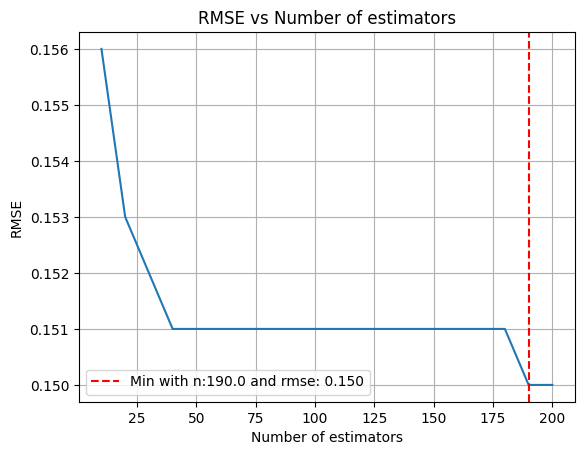

In [253]:
df_scores = pd.DataFrame(scores, columns=["n", "rmse"])

max_idx = df_scores.rmse.idxmin()
n_value = df_scores.iloc[max_idx].n
rmse_value = df_scores.iloc[max_idx].rmse

plt.plot(df_scores.n, df_scores.rmse)
plt.axvline(
    x=n_value,
    color="red",
    linestyle="--",
    label=f"Min with n:{n_value} and rmse: {rmse_value:.3f}",
)

plt.xlabel("Number of estimators")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of estimators")
plt.legend()
plt.grid(True)

In [254]:
scores = []
for d in [5, 10, 15]:
    for n in range(90, 121, 10):
        df = load_data()
        df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

        scaler, ohe, model = train_rfr_with_scaler(df_train, y_train, categorical, n_estimators=n, max_depth=d)
        rmse = predict_rfr_with_scaler(df_val, scaler, ohe, model, y_val)        
        scores.append((d, n, rmse))
scores

[(5, 90, np.float64(0.232)),
 (5, 100, np.float64(0.232)),
 (5, 110, np.float64(0.232)),
 (5, 120, np.float64(0.232)),
 (10, 90, np.float64(0.177)),
 (10, 100, np.float64(0.177)),
 (10, 110, np.float64(0.177)),
 (10, 120, np.float64(0.177)),
 (15, 90, np.float64(0.156)),
 (15, 100, np.float64(0.157)),
 (15, 110, np.float64(0.156)),
 (15, 120, np.float64(0.156))]

<Axes: xlabel='None-d', ylabel='n'>

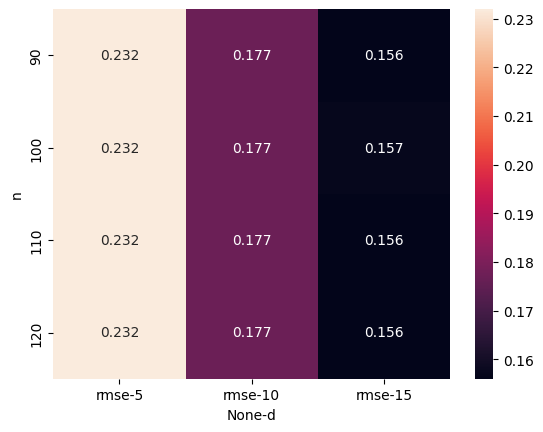

In [255]:
df_scores = pd.DataFrame(scores, columns=["d", "n", "rmse"])
df_score_pivot = df_scores.pivot(index="n", columns=["d"], values=["rmse"])
df_score_pivot.round(3)
sns.heatmap(df_score_pivot, annot=True, fmt=".3f")


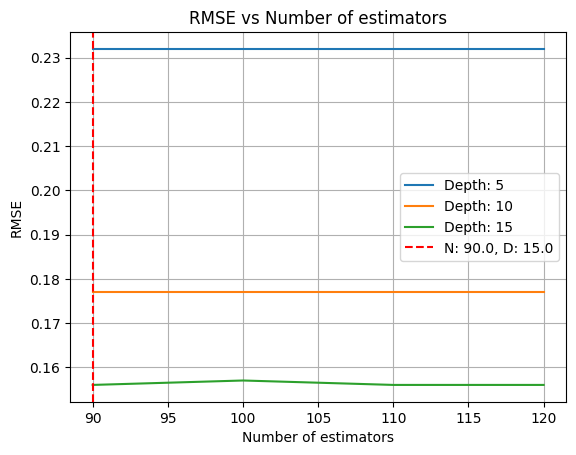

In [256]:
idxmin = df_scores.rmse.idxmin()
d_value = df_scores.iloc[idxmin].d
n_value = df_scores.iloc[idxmin].n
auc_value = df_scores.iloc[idxmin].rmse
n_value

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.d == d]
    plt.plot(df_subset.n, df_subset.rmse, label=f"Depth: {d}")

plt.axvline(x=n_value, color="red", linestyle="--", label=f"N: {n_value}, D: {d_value}")
plt.xlabel("Number of estimators")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of estimators")
plt.legend()
plt.grid(True)

In [257]:
max_depth = 15
n_estimators = 120

scores = []
for s in [1, 3, 5, 10, 50]:
    df = load_data()
    df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

    scaler, ohe, model = train_rfr_with_scaler(df_train, y_train, categorical, n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=s)
    rmse = predict_rfr_with_scaler(df_val, scaler, ohe, model, y_val)        
    scores.append((max_depth, n_estimators, s, rmse))
scores

[(15, 120, 1, np.float64(0.156)),
 (15, 120, 3, np.float64(0.156)),
 (15, 120, 5, np.float64(0.16)),
 (15, 120, 10, np.float64(0.168)),
 (15, 120, 50, np.float64(0.195))]

In [258]:
data_dropped = [tup[1:] for tup in scores]

<Axes: xlabel='None-n', ylabel='s'>

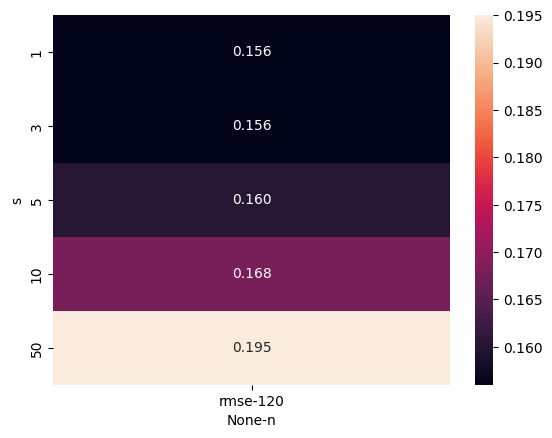

In [259]:

df_scores = pd.DataFrame(data_dropped, columns=["n", "s", "rmse"])
df_score_pivot = df_scores.pivot(index="s", columns=["n"], values=["rmse"])
df_score_pivot.round(3)
sns.heatmap(df_score_pivot, annot=True, fmt=".3f")


In [260]:
max_depth = 15
n_estimators = 120
min_samples_leaf = 3

df = load_data()
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

scaler, ohe, model = train_rfr_with_scaler(df_train, y_train, categorical, n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
rmse = predict_rfr_with_scaler(df_val, scaler, ohe, model, y_val)
rmse  # Best RMSE when using RandomForestRegressor with StandarScaler

np.float64(0.156)

#### Full Train vs Test

In [261]:
categorical = [
    "address", 
    "city"
]

numerical = [
    "floor", 
    "latitude", 
    "longitude", 
    "rooms", 
    "sq", 
    "year"
]

In [ ]:
max_depth = 15
n_estimators = 120
min_samples_leaf = 3

df = load_data(sq_threshold=500)
df_full_train, df_train, y_train, df_val, y_val, df_test, y_test = split_data(df)                     

full_df_train = pd.concat([df_train, df_val], axis=0, ignore_index=True)
full_df_train = full_df_train.reset_index(drop=True)
full_y_train = np.concatenate((y_train, y_val), axis=0)

scaler, ohe, model = train_rfr_with_scaler(full_df_train, full_y_train, categorical, n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
rmse = predict_rfr_with_scaler(df_test, scaler, ohe, model, y_test)
rmse  # Final RMSE when using RandomForestRegressor with StandarScaler vs Test data